# Logistic Regression

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
%matplotlib inline

## Gradient Descend

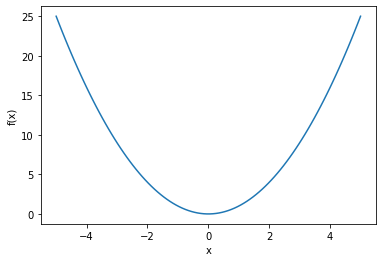

In [3]:
x_values = np.linspace(-5, 5, 100)
y_values = x_values**2
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
#plt.savefig('x2.pdf', bbox_inches = 'tight')

## Aufgabe: Händisch Gradient descend

<IPython.core.display.Javascript object>


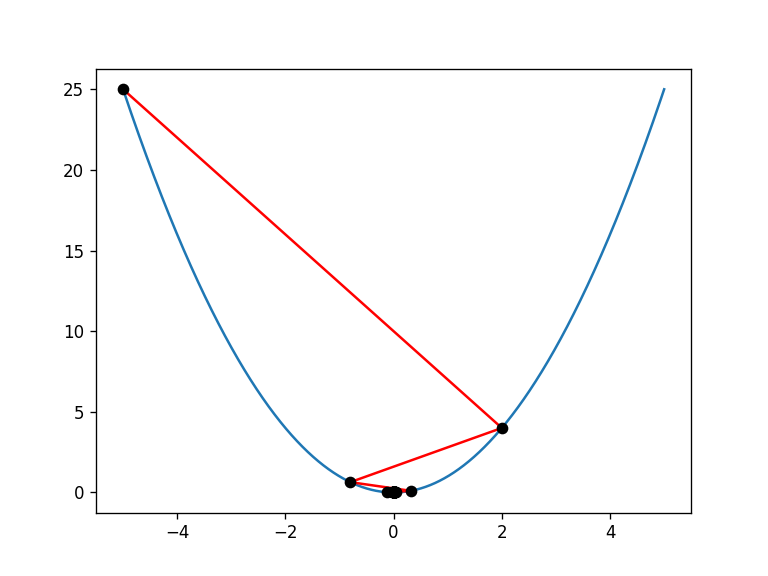

In [5]:
def f(x):
    return x**2
    
def f_(x):
    return 2*x


x_i = -5
alpha = 0.7
points = [x_i]
for _ in range(100):
    x_i = x_i - alpha*f_(x_i)
    points.append(x_i)
points = np.array(points)
    
x_values = np.linspace(-5, 5, 10000)
plt.plot(x_values, f(x_values))
plt.plot(points, f(points), color = 'red')
plt.scatter(points, f(points), color = 'black', zorder = 2)
#plt.savefig('grad_desc.pdf', bbox_inches = 'tight')

In [6]:
points[-1]

-8.034690221294782e-40

# Problem to classify

<IPython.core.display.Javascript object>


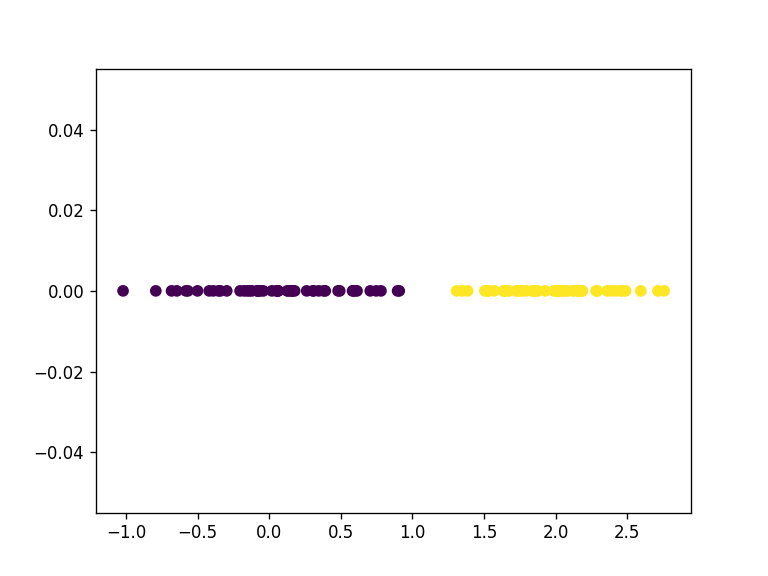

In [7]:
np.random.seed(0)
n = 50
X = np.concatenate([np.random.normal(loc = 0, scale = .4, size = n), np.random.normal(loc = 2, scale = .4, size = n)]).reshape(-1, 1)
X_affine = np.column_stack([np.ones(len(X)), X])
y = np.concatenate([np.zeros(n), np.ones(n)]).astype(int)

plt.scatter(X[:, 0], np.zeros(len(X)), c = y)
#plt.savefig('problem.pdf', bbox_inches = 'tight')

## Aufgabe: finde ein $\theta$

In [14]:
theta = np.array([-10, 10])

In [10]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

<IPython.core.display.Javascript object>


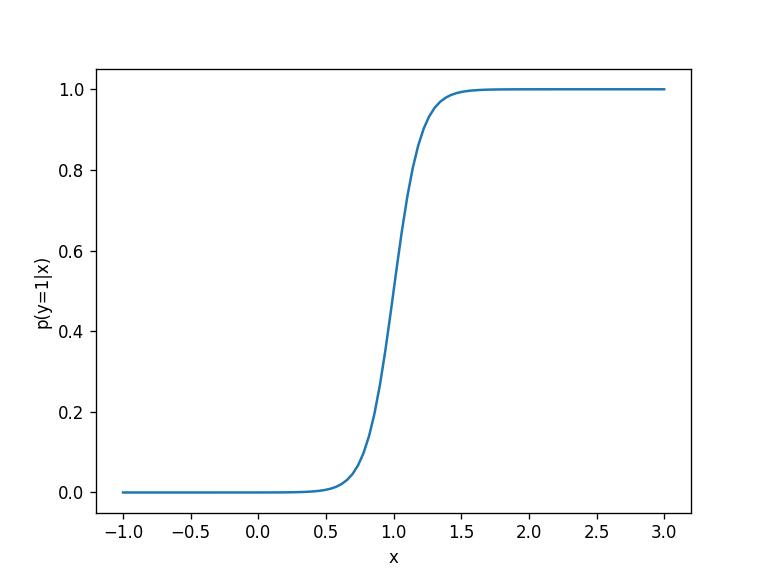

Text(0, 0.5, 'p(y=1|x)')

In [15]:
vs = np.linspace(-1, 3, 100)
probs = []
for v in vs:
    prob = sigmoid(theta[0] + theta[1]*v)
    probs.append(prob)
plt.plot(vs, probs)
plt.xlabel('x')
plt.ylabel('p(y=1|x)')
#plt.savefig('probs.pdf', bbox_inches = 'tight')

In [18]:
def cross_entropy_loss(X, y, theta):
    probs = sigmoid(X @ theta)
    return -np.mean(y*np.log(probs) + (1-y)*np.log(1-probs))
cross_entropy_loss(X_affine, y, theta)

0.010889328275199775

<IPython.core.display.Javascript object>


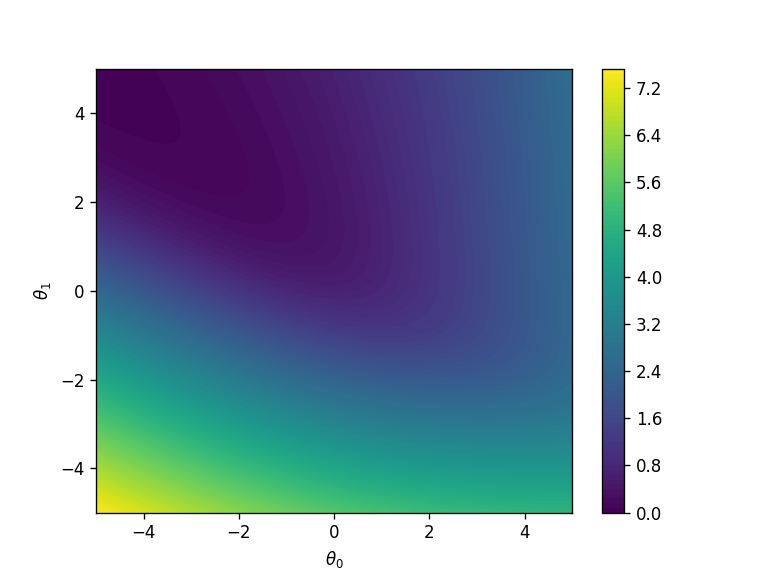

In [19]:
nx = 100
ny = 100
theta0 = np.linspace(-5, 5, nx) 
theta1 = np.linspace(-5, 5, ny)
theta0v, theta1v = np.meshgrid(theta0, theta1)

thetas = np.column_stack([theta0v.flatten(), theta1v.flatten()])
losses = np.array([cross_entropy_loss(X_affine, y, theta) for theta in thetas])
losses = losses.reshape(nx, ny)
plt.contourf(theta0v, theta1v, losses, levels = 100, vmin = 0)
plt.colorbar()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

## Aufgabe: Gradient von Crossentropy

Consider 

\begin{align}
K(p) &= y\log(p) + (1-y)\log(1-p)\\
p(h) &= 1/(1+\exp(-h))\\
h(x) &= x^T\theta
\end{align}

and use chain rule  + [MatrixCalculus](https://www.matrixcalculus.org/)

In [16]:
def cross_entropy_gradient(X, y, theta):
    return (X.T @ (sigmoid(X @ theta)- y))/y.shape[0]
cross_entropy_gradient(X_affine, y, theta)

array([0.00737708, 0.0053871 ])

<IPython.core.display.Javascript object>


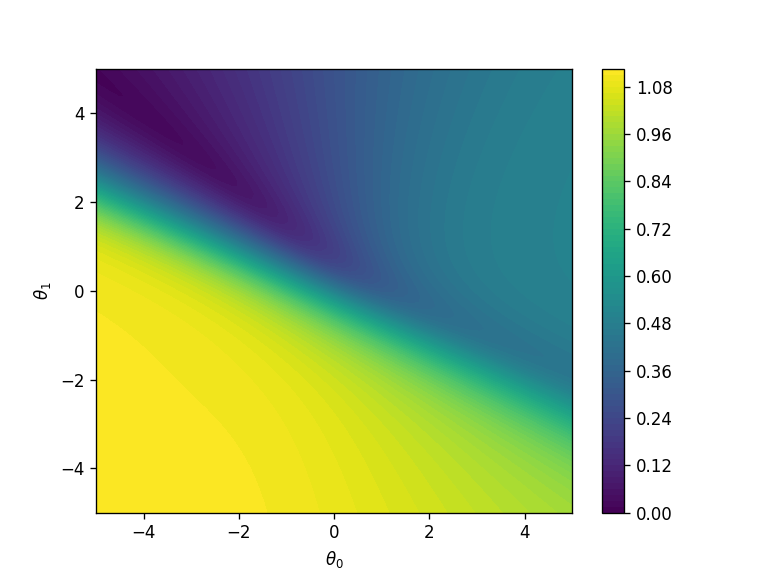

In [20]:
thetas = np.column_stack([theta0v.flatten(), theta1v.flatten()])
grads = np.array([np.linalg.norm(cross_entropy_gradient(X_affine, y, theta)) for theta in thetas])
grads = grads.reshape(nx, ny)
plt.contourf(theta0v, theta1v, grads, levels = 100, vmin =0 )
plt.colorbar()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()
#plt.savefig('grad.pdf', bbox_inches = 'tight')